<a href="https://colab.research.google.com/github/ManasVardhan/ANN_notebooks/blob/master/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
This is an implementation of Auto Regressive Linear model using tensorflow
Autoregressive model means a model that makes use of its own predicted values
to make predictions of future values
'''

'\nThis is an implementation of Auto Regressive Linear model using tensorflow\nAutoregressive model means a model that makes use of its own predicted values\nto make predictions of future values\n'

In [ ]:
import tensorflow as tf

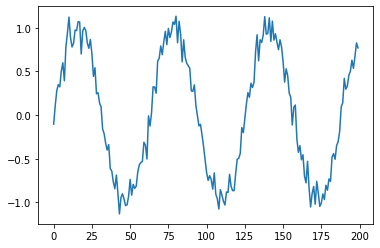

In [ ]:
#creating a dataset
import numpy as np
import matplotlib.pyplot as plt


series = np.sin(0.1*np.arange(200)) + 0.1*np.random.randn(200)
plt.plot(series)



In [ ]:
#building the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]      
  y = series[t+T]
  X.append(x)
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print('Shape of X {} \nShape of Y {}'.format(X.shape,Y.shape))

Shape of X (190, 10) 
Shape of Y (190,)


In [ ]:
model = tf.keras.Sequential([
                     tf.keras.layers.Input(shape=(T,)),
                     tf.keras.layers.Dense(1)
                     
])

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.1),)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
r = model.fit(X[:-N//2],Y[:-N//2],epochs = 80,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 29ms/step - loss: 0.1396 - val_loss: 0.0668
Epoch 2/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0618 - val_loss: 0.0328
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0569 - val_loss: 0.0452
Epoch 4/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0454 - val_loss: 0.0525
Epoch 5/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.0430
Epoch 6/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0383 - val_loss: 0.0365
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0294 - val_loss: 0.0286
Epoch 8/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0241 - val_loss: 0.0264
Epoch 9/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0273 - val_loss: 0.0277
Epoch 10/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0276 - val_loss: 0.0272
Epoch 11/80
3/3 [=====================

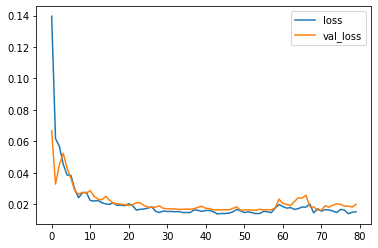

In [ ]:
#accuracy is calculated in classification problems

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

In [ ]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p